This notebook contains a brief example with synthetic data to outline a few different functionalites of the library

In [1]:
from BPt import BPt_ML
import os
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [2]:
ML = BPt_ML(log_dr = None)

exp_name = My_Exp
log_dr = None
existing_log = append
verbose = True
exp log dr setup at: None
log file at: None
Default params set:
notebook = True
use_abcd_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 534
n_jobs = 1
dpi = 100
mp_context = spawn
BPt_ML object initialized


First we will make a fake dataset

In [3]:
X, y = make_regression(n_samples = 200, n_features=50, n_informative=10, random_state=50)

# Set a bunch of samples in X to be NaN
for i in range(500):
    x_ind = np.random.randint(0, X.shape[0]-1)
    y_ind = np.random.randint(0, X.shape[1]-1)
    X[x_ind][y_ind] = np.nan

# Turn into dataframe
data = pd.DataFrame(X, columns = ['feat_' + str(i) for i in range(50)])
data['target'] = y
data.index.name = 'src_subject_id'
data.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,target
src_subject_id,,,,,,,,,,,,,,,,,,,,,
0,0.448726,0.015948,-0.204905,1.542588,0.982689,0.578431,0.053168,0.379266,-0.231897,-0.134540,...,0.289969,0.148654,-0.366663,-0.857876,1.810803,0.729462,-1.321590,0.204298,-0.607624,76.314025
1,-0.666360,-0.434249,-0.637180,-0.881889,-0.660857,-1.010713,-0.059235,0.101189,-1.352481,0.456329,...,0.005210,-0.382381,-0.159197,1.605679,-0.582950,0.052484,-0.101523,-0.446232,0.627793,-174.339946
2,-1.446813,1.335919,-0.052072,1.172187,-0.793520,1.317352,0.409554,-0.649988,2.588831,-0.838968,...,-0.639772,-0.292024,2.120161,1.106111,-0.194791,-0.658574,-0.912551,-0.404914,-0.421168,134.226804
3,0.629656,-0.027501,-0.850591,-1.368709,1.273120,-0.308182,-0.143431,2.215042,1.326657,-0.364228,...,-0.606735,0.160584,-2.553399,0.299634,-0.781526,0.149973,-1.320861,-1.332549,0.446014,-36.797065
4,1.029052,-1.746792,-0.068159,1.092551,1.121460,-0.473774,-1.180931,2.054788,-0.111453,1.260893,...,0.150899,0.883766,0.213149,-0.283384,0.742141,0.253684,-1.998354,0.737763,-0.518536,-275.651078


Let's first load in the target column as is

Setting default load params, as they have not been set!

Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: src_subject_id
eventname: None
eventname_col: eventname
overlap_subjects: False
merge: inner
na_values: ['777', '999']
drop_na: True
drop_or_na: drop

To change the default load params, call self.Set_Default_Load_Params()

Loading from df or files
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: target
10

Loaded Shape: (200, 1)
All loaded targets
0 : target

Set to overlapping loaded subjects.
-- target --


,target
count,200.000
mean,3.792
std,184.795
min,-389.095
25%,-139.961
50%,-8.500
75%,143.018
max,489.688
median,-8.500
skew,0.227


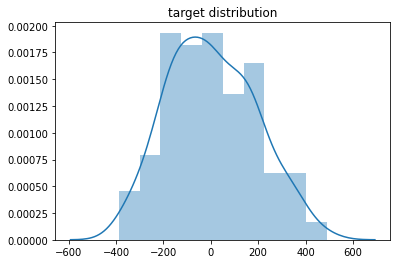

In [4]:
# Load in the target
ML.Load_Targets(df=data,
                col_name='target',
                data_type='float',
                subject_id='subject_id')
ML.Show_Targets_Dist()

Next, we will explore some functionalites of the data loading, specifically we will load in feature 1, using the f2c class, which means we want to go from float to categorical. We pass the further relevant params float_bins and float_bin_strategy to specify how the variable should be encoded. Next, we handle missing values in an interesting way. By passing drop_na false, we are keeping NaN's in the data, and next by passing nan_as_class = True, we can specify that any missing values be added as an extra class.

Note that we can either specify unique params for each feature loaded, e.g., number of float bins, or just keep the same params for all by passing one value.

cleared covars.

Loading from df or files
Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 19
loading: feat_0
KBins encoded 5 bins
loading: feat_1
KBins encoded 6 bins
Loaded Shape: (200, 2)
Set to overlapping loaded subjects.
-- feat_0 --


,Original_Name,Counts,Frequency
Internal_Name,,,
0,-2.236 - -1.216,18,0.090
1,-1.216 - -0.196,53,0.265
2,-0.196 - 0.823,75,0.375
3,0.823 - 1.843,38,0.190
4,1.843 - 2.863,5,0.025
5,nan,11,0.055


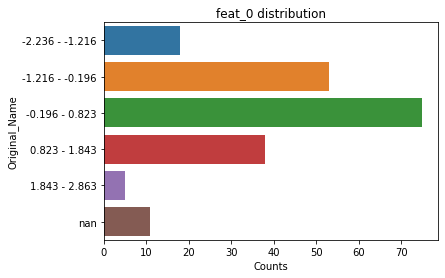


-- feat_1 --


,Original_Name,Counts,Frequency
Internal_Name,,,
0,-2.531 - -1.753,7,0.035
1,-1.753 - -0.975,26,0.130
2,-0.975 - -0.197,49,0.245
3,-0.197 - 0.58,57,0.285
4,0.58 - 1.358,36,0.180
5,1.358 - 2.136,16,0.080
6,nan,9,0.045


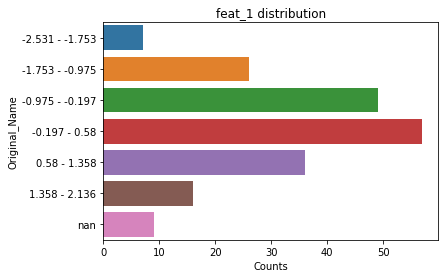

In [5]:
ML.Load_Covars(df = data,
               col_name = ['feat_0', 'feat_1'],
               data_type = 'f2c',
               float_bins = [5, 6],
               float_bin_strategy = 'uniform',
               drop_na = False,
               nan_as_class = True,
               clear_existing = True)
ML.Show_Covars_Dist()

We will load the rest of the data as just float type - but as before keep missing values

In [6]:
ML.Load_Data(df = data,
             drop_keys = ['feat_0', 'feat_1', 'target'],
             drop_na = False,
             clear_existing = True)
ML.Show_Data_Dist()

Cleared loaded data.

Loading from df or files

Dropped 13 columns per passed drop_keys argument
Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 169

Loaded NaN Info:
There are: 377 total missing values
6 columns found with 11 missing values (column name overlap: ['feat_'])
6 columns found with 8 missing values (column name overlap: ['feat_'])
5 columns found with 12 missing values (column name overlap: ['feat_'])
4 columns found with 14 missing values (column name overlap: ['feat_'])
4 columns found with 10 missing values (column name overlap: ['feat_'])
3 columns found with 13 missing values (column name overlap: ['feat_'])
3 columns found with 5 missing values (column name overlap: ['feat_'])
2 columns found with 7 missing values (column name overlap: ['feat_2'])

Loaded Shape: (200, 38)
Set to overlapping loaded subjects.
Plotting data distribution.
Viewing data with shape: (200, 38)

Loaded data top columns by skew:
feat_48   -0.261316
feat_40   -0.238145
fea

Random tr test split

In [7]:
ML.Train_Test_Split(test_size=0.2,
                    random_state=1001)

Calling Prepare_All_Data() to change the default merge behavior call it again!
Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (200, 41)
Performing split on 200 subjects!
random_state: 1001
Test split size: 0.2

Performed train test split
Train size: 160
Test size:  40


First we define a problem spec, which just holds some commonly re-used information about the modelling.

In [8]:
from BPt import Problem_Spec

In [9]:
spec = Problem_Spec(problem_type = 'regression',
                    scorer = 'r2',
                    random_state = 1001,
                    n_jobs = 8)
spec

Problem_Spec(n_jobs=8, random_state=1001, scorer='r2')

Next we will consider defining an imputation strategy. Importantly, we only have two categorical features, and we have alreadly handled the NaN's present via treating them as a seperate class. This actually really simplifies how we set up imputation, as when there are categorical features we wish to also impute, then we have to be more careful in setting up the scope / choice of imputation method. E.g., If you wanted to fit an iterative imputation model seperately on categorical features vs. float features, then depending on which you want to model first, you would have to restrict the input - passing either scope = 'float' first, thus restricting the model to having input from just other float features or vice versa with categorical. One option in this case is to just ignore treating categorical features seperate, and impute them with a regressor... or maybe an even better option is to do what we did in this example and encode the categorical NaN values as a seperate class.

That said... all we have to worry about is passing one Imputer object, that can act with scope = 'all' or on all features.

In [10]:
from BPt import Imputer, Model

In [11]:
# For our first imputer, lets just use mean imputation
imputer1 = Imputer(obj='mean', scope='all')
imputer1

Imputer(extra_params={}, obj='mean')

In [12]:
# For our second, lets define an iterative imputer - with a baysiean ridge regressor as the base model
imputer2 = Imputer(obj='iterative', base_model=Model('bayesian ridge regressor'), scope='all')
imputer2

Imputer(base_model=Model(extra_params={}, obj='bayesian ridge regressor'),
        extra_params={}, obj='iterative')

The next thing we will consider is the use of a transformer for the categorical features, specifically, lets say we want to one hot encode both of the categorical features, feat_0 and feat_1, seperately. For this we can pass a 'Duplicate' object to Scope

In [13]:
from BPt import Transformer, Duplicate

transformers = Transformer(obj="one hot encoder", scope=Duplicate(['feat_0', 'feat_1']))
transformers

Transformer(extra_params={}, obj='one hot encoder',
            scope=Duplicate(['feat_0', 'feat_1']))

In [14]:
# Essentially, the above case of using duplicate is the same as passing
alt_transformers = [Transformer(obj="one hot encoder", scope='feat_0'),
                Transformer(obj="one hot encoder", scope='feat_1')]
alt_transformers

[Transformer(extra_params={}, obj='one hot encoder', scope='feat_0'),
 Transformer(extra_params={}, obj='one hot encoder', scope='feat_1')]

Lastly, we will define a simple model pipeline with a decision tree Model

In [15]:
from BPt import Model_Pipeline

pipeline = Model_Pipeline(imputers=imputer1,
                          transformers=transformers,
                          scalers=None,
                          model=Model('dt'))

pipeline

Model_Pipeline(imputers=Imputer(extra_params={}, obj='mean'),
               model=Model(extra_params={}, obj='dt'), scalers=None,
               transformers=[Transformer(extra_params={}, obj='one hot encoder',
                                         scope='feat_0'),
                             Transformer(extra_params={}, obj='one hot encoder',
                                         scope='feat_1')])

In [16]:
eval_results = ML.Evaluate(model_pipeline = pipeline,
                           problem_spec = spec,
                           splits = 3,
                           n_repeats = 1)

Setting default ML verbosity settings!
Note, if the following values are not desired, call self.Set_Default_ML_Verbosity()
Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
progress_loc: None
compute_train_score: False
show_init_params: True
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: False
best_params: False
save_to_logs: False

Model_Pipeline
--------------
imputers=\
Imputer(extra_params={}, obj='mean')

transformers=\
[Transformer(extra_params={}, obj='one hot encoder', scope='feat_0'),
 Transformer(extra_params={}, obj='one hot encoder', scope='feat_1')]

model=\
Model(extra_params={}, obj='dt')

param_search=\
None



Problem_Spec
------------
problem_type = regression
target = target
scorer = r2
weight_scorer = False
scope = all
subjects = all
len(subjects) = 200 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1001

Evaluate Params
---------------
splits = 3
n_repeats




Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.03778773464363738
Std in Validation score:  0.144728786671978



We can also try the same setup but with the alternate imputer

In [17]:
pipeline.imputers = imputer2

eval_results = ML.Evaluate(model_pipeline = pipeline,
                           problem_spec = spec,
                           splits = 3,
                           n_repeats = 1)

Model_Pipeline
--------------
imputers=\
Imputer(base_model=Model(extra_params={}, obj='bayesian ridge'),
        extra_params={}, obj='iterative')

transformers=\
[Transformer(extra_params={}, obj='one hot encoder', scope='feat_0'),
 Transformer(extra_params={}, obj='one hot encoder', scope='feat_1')]

model=\
Model(extra_params={}, obj='dt')

param_search=\
None



Problem_Spec
------------
problem_type = regression
target = target
scorer = r2
weight_scorer = False
scope = all
subjects = all
len(subjects) = 200 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1001

Evaluate Params
---------------
splits = 3
n_repeats = 1
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 160 (before overlap w/ problem_spec.subjects)
run_name = dt0






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.03212840647007942
Std in Validation score:  0.15560987515195365

